# Module 2: Exploration data analysis of visualization and training a model by given attributes

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load given dataset
data = p.read_csv('UPI_FRAUD.csv')

In [4]:
del data['Merchant_id']
del data['TransactionDate']

In [5]:
df = data.dropna()

In [6]:
df.columns

Index(['AverageAmountTransactionDay', 'TransactionAmount', 'Is_declined',
       'TotalNumberOfDeclinesDay', 'isForeignTransaction', 'isHighRiskCountry',
       'DailyChargebackAvgAmt', 'Six_MonthAvgChbkAmt', 'Six_MonthChbkFreq',
       'isFradulent'],
      dtype='object')

Text(0.5, 1.0, 'Transaction Amount & Declines')

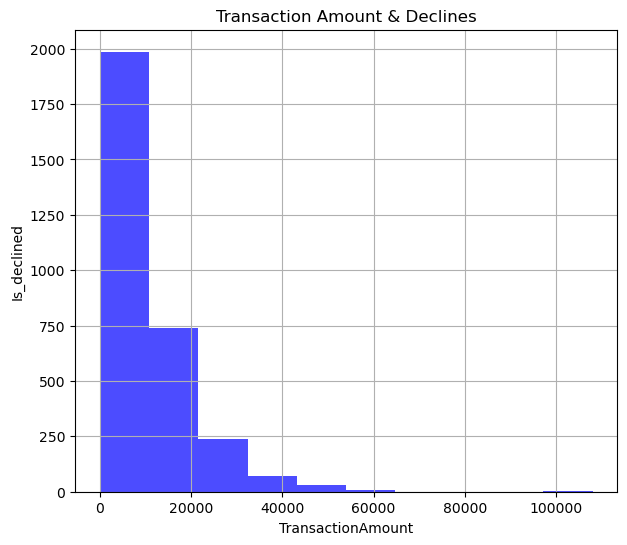

In [7]:
#Histogram Plot of Age distribution
df['TransactionAmount'].hist(figsize=(7,6), color='b', alpha=0.7)
plt.xlabel('TransactionAmount')
plt.ylabel('Is_declined')
plt.title('Transaction Amount & Declines')

isHighRiskCountry
N    93.33
Y     6.67
Name: count, dtype: float64

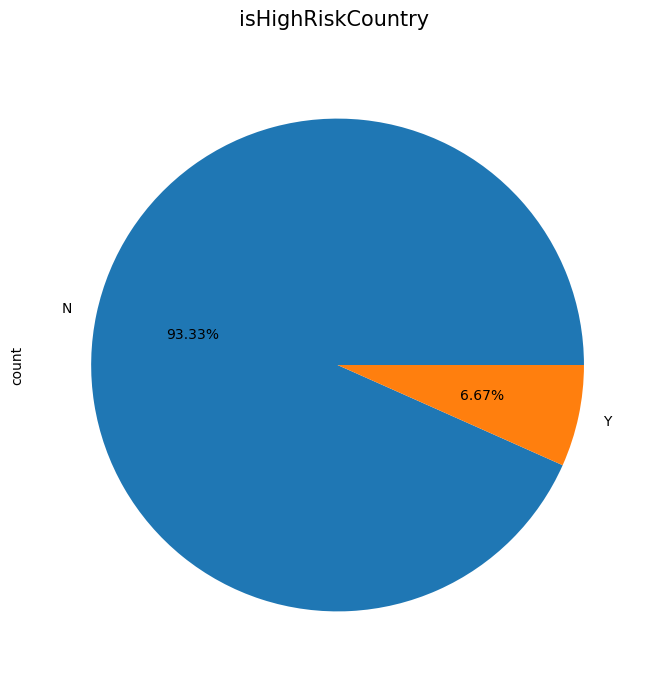

In [8]:
 #Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(8,8), autopct='%1.2f%%', fontsize = 10)
    ax.set_title(variable + ' \n', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)
PropByVar(df, 'isHighRiskCountry')

isFradulent
N    85.43
Y    14.57
Name: count, dtype: float64

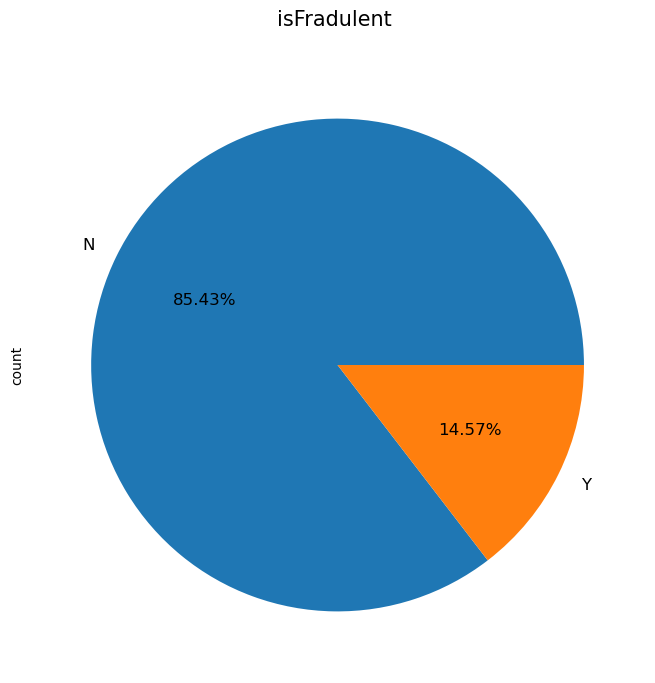

In [9]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(8,8), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)

PropByVar(df, 'isFradulent')

In [10]:
from sklearn.preprocessing import LabelEncoder
var_mod =['AverageAmountTransactionDay', 'TransactionAmount', 'Is_declined',
       'TotalNumberOfDeclinesDay', 'isForeignTransaction', 'isHighRiskCountry',
       'DailyChargebackAvgAmt', '6_MonthAvgChbkAmt', '6_MonthChbkFreq',
       'isFradulent']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

KeyError: '6_MonthAvgChbkAmt'

In [ ]:
# Heatmap plot diagram
fig, ax = plt.subplots(figsize=(15,7))
s.heatmap(df.corr(), ax=ax, annot=True)

In [ ]:
plt.boxplot(df['AverageAmountTransactionDay'])
plt.show()

In [ ]:
import seaborn as s
s.boxplot(df['AverageAmountTransactionDay'], color='m')

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['AverageAmountTransactionDay'],df['DailyChargebackAvgAmt'])
ax.set_xlabel('AverageAmountTransactionDay')
ax.set_ylabel('DailyChargebackAvgAmt')
ax.set_title('Daily Transaction & Chargeback Amount')
plt.show()

In [ ]:
df.columns

In [ ]:
plt.plot(df["TransactionAmount"], df["DailyChargebackAvgAmt"], color='g')
plt.xlabel('TransactionAmount')
plt.ylabel('DailyChargebackAvgAmt')
plt.title('Credit Card Transaction')
plt.show()

In [ ]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='isFradulent', axis=1)
#Response variable
y = df.loc[:,'isFradulent'] 

In [ ]:
#We'll use a test size of 20%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

In [ ]:
def qul_No_qul_bar_plot(df, bygroup):
    dataframe_by_Group = p.crosstab(df[bygroup], columns=df["isFradulent"], normalize = 'index')
    dataframe_by_Group = n.round((dataframe_by_Group * 100), decimals=2)
    ax = dataframe_by_Group.plot.bar(figsize=(15,7));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(dataframe_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('Credit Card Transaction (%) (by ' + dataframe_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(dataframe_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return dataframe_by_Group



In [ ]:
qul_No_qul_bar_plot(df,'TotalNumberOfDeclinesDay')